<a href="https://colab.research.google.com/github/amalvaz-ai/Capstone-Analysis/blob/main/QM640_Capstone_Robert_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>QM 640 Capstone Project </center></h1>

## Problem Statement

### Objective

The goal of this project is to formulate hypothesis and analyze correlations and build a predictive and explanatory model that quantifies how these variables interact and influence gas powered vehicle sales over time. By using statistical analysis and forecasting techniques, the study aims to provide insights that support market planning, policy design, and strategic decision making within the evolving automotive landscape. As electrification accelerates, understanding these dynamics is essential for anticipating future mobility trends and preparing for the long term transition away from internal combustion vehicles.

### Data Description

Three data sets are to be used:
(1)EV vs Gas Cars registration in US States from 2016 to 2023
(2)Gas price history in US by region
(3)EV Laws and Incentives in US by states


**Data Dictionary**
(1)EV vs Gas Cars registration
State :The geographic area: United States, 50 states, or District of Columbia.
Measure Names : Category of Vehicle by fuel type
Year of Year : Calendar year (2016–2023).
Measure Values : Numeric value for the measure (Registration volume by measure name)
(2)Gas price history in US by region
This file contains the raw data of monthly gasoline prices in US by region. Data needs to be preprocessed to perform analysis with
(3) EV Laws and Incentives

US_State :U.S. state or jurisdiction where the incentive is offered (e.g., California, Illinois, Texas, D.C.).
Year : The year the incentive program is applicable or active.
Program Name : The official name or designation of the incentive program.
Incentive_Type : The specific incentive mechanism (e.g., Rebate, Tax Credit, Grant, Sales Tax Exemption, Utility Program).
Type : High level classification of the program: Purchase Incentive, Ownership Incentive, Charging Infrastructure Incentive, Fleet/Commercial, or Other.
Amount_USD : The monetary incentive amount, when applicable; may represent maximum or fixed values.
Amount_Notes : Qualifiers or rules for calculating the incentive amount (e.g., capped amount, percent based, battery size requirements).
Income_Eligibility : Indicates whether the program includes income restrictions or tiered eligibility thresholds.
Vehicle_Price_Cap_USD : Maximum vehicle price allowed for eligibility, if applicable.
Stackable : Indicates whether the incentive can be combined with other state or federal programs.
Program_Status: The status of the program during the specified year (Active, Closed, Expired, Suspended, Upcoming).
Start_Date : The date the incentive program began.
End_Date : The date the program ended, or null if still active.
Administering_Agency : The government or utility organization responsible for operating or managing the incentive.
Source_URL : Official documentation or website that verifies program details.

## Importing the necessary libraries

In [40]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# read files from github
url1 = "https://github.com/amalvaz-ai/Capstone-Analysis/raw/main/US_Cars_Registration.xlsx"
url2 = 'https://raw.githubusercontent.com/amalvaz-ai/Capstone-Analysis/main/ev_incentives_by_state_by_year_2016_2023.csv'
url3= 'https://raw.githubusercontent.com/amalvaz-ai/Capstone-Analysis/main/Gas_Price_Avg.xls'
df_carreg = pd.read_excel(url1)
df_evin = pd.read_csv(url2)
df_gas = pd.read_excel(url3)



## Data Preparation

### Car Registration Data

#### Mapping to State Codes

In [5]:
# Adding 'United States' to the state_to_abbrev mapping to convert to 'US'
# and explicit for df_carreg transformation here.
state_to_abbrev_extended = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'United States': 'US' # Add United States to US mapping
}

# Apply the mapping to the 'State' column of df_carreg
df_carreg['State'] = df_carreg['State'].replace(state_to_abbrev_extended)

# Display the head to verify the transformation
print(df_carreg.head())

  State                             Measure Names  Year of Year  \
0    US  EV Electric Consumption (megawatt hours)          2024   
1    US               Total Vehicle Registrations          2023   
2    US              Diesel Vehicle Registrations          2023   
3    US                 Gas Vehicle Registrations          2023   
4    US                        PHEV registrations          2023   

   Measure Values  
0  11740439.00000  
1 287096500.00000  
2   7184300.00000  
3 242870900.00000  
4   1307200.00000  


#### Car Reg Data bottom 5 Rec

In [6]:
df_carreg.tail()


,State,Measure Names,Year of Year,Measure Values
3265,WY,Gas Vehicle Registrations,2016,448600.00000
3266,WY,PHEV registrations,2016,100.00000
3267,WY,HEV registrations,2016,3800.00000
3268,WY,EV registrations,2016,100.00000
3269,WY,EV Electric Consumption (megawatt hours),2016,NaN


#### Name uniform composite keys

In [7]:
df_carreg.rename(columns={'State': 'US_State', 'Year of Year': 'Year'}, inplace=True)
print(df_carreg.head())

  US_State                             Measure Names  Year  Measure Values
0       US  EV Electric Consumption (megawatt hours)  2024  11740439.00000
1       US               Total Vehicle Registrations  2023 287096500.00000
2       US              Diesel Vehicle Registrations  2023   7184300.00000
3       US                 Gas Vehicle Registrations  2023 242870900.00000
4       US                        PHEV registrations  2023   1307200.00000


#### Pivot Measures to Gas and EV

In [8]:
df_carreg_filtered = df_carreg[df_carreg['Measure Names'].isin(['Gas Vehicle Registrations', 'EV registrations'])]

df_carreg_pivot = df_carreg_filtered.pivot_table(index=['US_State', 'Year'], columns='Measure Names', values='Measure Values').reset_index()
print(df_carreg_pivot.head())

Measure Names US_State  Year  EV registrations  Gas Vehicle Registrations
0                   AK  2016         200.00000               525900.00000
1                   AK  2017         400.00000               506800.00000
2                   AK  2018         500.00000               484900.00000
3                   AK  2019         700.00000               473700.00000
4                   AK  2020         900.00000               460900.00000


### EV incentive Data

#### Original Data from Source

In [9]:
# loading the dataset
df_evin

,US_State,Year,Program_Name,Incentive_Type,Amount_USD,Amount_Notes,Income_Eligibility,Vehicle_Price_Cap_USD,Stackable,Program_Status,Start_Date,End_Date,Administering_Agency,Source_URL
0,US,2016,Electric Vehicle (EV) and Fuel Cell Electric V...,TAX,NaN,The Qualified Plug-in Electric Drive Motor Veh...,NaN,NaN,NaN,expired,2008-10-03 00:00:00 UTC,2025-09-30 23:59:59 UTC,U.S. Internal Revenue Service,https://www.congress.gov/112/plaws/publ240/PLA...
1,US,2017,Electric Vehicle (EV) and Fuel Cell Electric V...,TAX,NaN,The Qualified Plug-in Electric Drive Motor Veh...,NaN,NaN,NaN,expired,2008-10-03 00:00:00 UTC,2025-09-30 23:59:59 UTC,U.S. Internal Revenue Service,https://www.congress.gov/112/plaws/publ240/PLA...
2,US,2018,Electric Vehicle (EV) and Fuel Cell Electric V...,TAX,NaN,The Qualified Plug-in Electric Drive Motor Veh...,NaN,NaN,NaN,expired,2008-10-03 00:00:00 UTC,2025-09-30 23:59:59 UTC,U.S. Internal Revenue Service,https://www.congress.gov/112/plaws/publ240/PLA...
3,US,2019,Electric Vehicle (EV) and Fuel Cell Electric V...,TAX,NaN,The Qualified Plug-in Electric Drive Motor Veh...,NaN,NaN,NaN,expired,2008-10-03 00:00:00 UTC,2025-09-30 23:59:59 UTC,U.S. Internal Revenue Service,https://www.congress.gov/112/plaws/publ240/PLA...
4,US,2020,Electric Vehicle (EV) and Fuel Cell Electric V...,TAX,NaN,The Qualified Plug-in Electric Drive Motor Veh...,NaN,NaN,NaN,expired,2008-10-03 00:00:00 UTC,2025-09-30 23:59:59 UTC,U.S. Internal Revenue Service,https://www.congress.gov/112/plaws/publ240/PLA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,WA,2019,Low-Income Electric Vehicle (EV) Rebates,RBATE,NaN,The Washington EV Instant Rebate Program offer...,NaN,NaN,NaN,enacted,2024-10-01 00:00:00 UTC,NaN,NaN,NaN
596,WA,2020,Low-Income Electric Vehicle (EV) Rebates,RBATE,NaN,The Washington EV Instant Rebate Program offer...,NaN,NaN,NaN,enacted,2024-10-01 00:00:00 UTC,NaN,NaN,NaN
597,WA,2021,Low-Income Electric Vehicle (EV) Rebates,RBATE,NaN,The Washington EV Instant Rebate Program offer...,NaN,NaN,NaN,enacted,2024-10-01 00:00:00 UTC,NaN,NaN,NaN
598,WA,2022,Low-Income Electric Vehicle (EV) Rebates,RBATE,NaN,The Washington EV Instant Rebate Program offer...,NaN,NaN,NaN,enacted,2024-10-01 00:00:00 UTC,NaN,NaN,NaN


#### Extract Incentive Specific Data

In [10]:
# Normalize column names (handles spaces/case/hyphens safely)
df_evin.rename(
    columns={c: c.strip().lower().replace(" ", "_").replace("-", "_") for c in df_evin.columns},
    inplace=True
)

# Expected columns after normalization: 'us_state', 'year', 'incentive_type'
initial_required_cols = ["us_state", "year", "incentive_type"]
missing = [c for c in initial_required_cols if c not in df_evin.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}. Got: {list(df_evin.columns)}")

# Create a temporary DataFrame for processing that includes only the initial required columns
# and ensure 'incentive_type' is handled for NaNs before splitting
temp_df = df_evin[initial_required_cols].copy()
temp_df['incentive_type'] = temp_df['incentive_type'].fillna('')

# Create dummy variables for each incentive type present in the delimited string
incentive_dummies = temp_df['incentive_type'].str.get_dummies(sep='|')

# Normalize column names of the dummies (lowercase)
incentive_dummies.columns = [col.lower() for col in incentive_dummies.columns]

# Concatenate the new dummy variables with the temporary DataFrame
temp_df = pd.concat([temp_df, incentive_dummies], axis=1)

# Rename 'year' to 'year_active' as per original logic
temp_df.rename(columns={"year": "year_active"}, inplace=True)

# Group and sum the incentive columns, then ensure 'year_active' is int64
df_evin1 = temp_df.groupby(['us_state', 'year_active'])[incentive_dummies.columns].sum().reset_index()
df_evin1['year_active'] = df_evin1['year_active'].astype('int64')


# 4) Save the result
df_evin1.to_csv("incentives_state_type_year_expanded.csv", index=False) # Changed filename to reflect expansion

# print output
print(df_evin1.head(10))
print({
    "rows": len(df_evin1),
    "unique_states": df_evin1["us_state"].nunique(),
    "unique_years": df_evin1["year_active"].nunique(),
    "unique_incentive_types_raw": df_evin['incentive_type'].nunique(), # To show original unique values
    "new_incentive_columns": list(incentive_dummies.columns)
})

  us_state  year_active  exem  gnt  other  rbate  tax
0       AL         2016     0    0      0      1    0
1       AL         2017     0    0      0      1    0
2       AL         2018     0    0      0      1    0
3       AL         2019     0    0      0      1    0
4       AL         2020     0    0      0      1    0
5       AL         2021     0    0      0      1    0
6       AL         2022     0    0      0      1    0
7       AL         2023     0    0      0      1    0
8       AZ         2016     1    0      0      0    2
9       AZ         2017     1    0      0      0    2
{'rows': 248, 'unique_states': 31, 'unique_years': 8, 'unique_incentive_types_raw': 5, 'new_incentive_columns': ['exem', 'gnt', 'other', 'rbate', 'tax']}


#### Name Uniform Composite Key

In [11]:
df_evin1.rename(columns={'us_state': 'US_State', 'year_active': 'Year'}, inplace=True)
print(df_evin1.head())

  US_State  Year  exem  gnt  other  rbate  tax
0       AL  2016     0    0      0      1    0
1       AL  2017     0    0      0      1    0
2       AL  2018     0    0      0      1    0
3       AL  2019     0    0      0      1    0
4       AL  2020     0    0      0      1    0


### Gas price data

#### Original Data from Source

In [12]:
# loading the dataset
df_gas

,Date,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly East Coast All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly New England (PADD 1A) All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Lower Atlantic (PADD 1C) All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Midwest All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Gulf Coast All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Rocky Mountain All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly California All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Colorado All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Florida All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Massachusetts All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Minnesota All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly New York All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Ohio All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Texas All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Washington All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),"Weekly Boston, MA All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)",Weekly Chicago All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),"Weekly Cleveland, OH All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)",Weekly Denver All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Houston All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Los Angeles All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),"Weekly Miami, FL All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)",Weekly New York City All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly San Francisco All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),"Weekly Seattle, WA All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)"
0,2016-01-04,2.13500,2.13800,2.15500,2.21100,2.07900,1.94500,1.85400,2.04500,2.73100,2.93000,1.94300,2.09200,2.10900,1.90400,2.29400,1.97200,1.84800,2.48100,2.10600,2.18500,2.02800,1.95000,1.85700,3.16000,2.41300,2.14700,2.80600,2.54100
1,2016-01-11,2.10400,2.11000,2.12300,2.18900,2.04600,1.90600,1.83100,2.02800,2.69800,2.89700,1.93100,2.06400,2.08500,1.86300,2.26300,1.92700,1.82600,2.42500,2.08200,2.16400,1.98900,1.93600,1.82300,3.11300,2.35700,2.12300,2.79100,2.50900
2,2016-01-18,2.02200,2.04500,2.07000,2.11400,1.98700,1.79600,1.77800,1.98800,2.59100,2.76700,1.88200,1.99900,2.03900,1.77500,2.20000,1.76300,1.77000,2.35500,2.03400,2.01900,1.81500,1.88600,1.75800,2.95000,2.28400,2.05600,2.70100,2.45100
3,2016-01-25,1.96500,2.00600,2.04000,2.08600,1.93700,1.71400,1.73400,1.94300,2.52600,2.69700,1.83500,1.95800,2.01700,1.73100,2.17300,1.64100,1.72800,2.29900,2.01100,1.90400,1.71500,1.84700,1.73100,2.85900,2.26300,2.02700,2.64900,2.38300
4,2016-02-01,1.93200,1.97700,2.01100,2.05000,1.91300,1.70800,1.69700,1.88600,2.44300,2.60500,1.77800,1.92100,1.99200,1.69200,2.13300,1.72800,1.68800,2.20400,1.98400,1.79800,1.78300,1.78500,1.70300,2.77600,2.23900,1.99700,2.58700,2.26600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2025-12-15,3.02400,2.96000,3.06600,3.13100,2.82600,2.77400,2.59400,2.67500,3.98400,4.27800,2.44000,2.83700,3.09200,2.89600,3.11600,2.9280

#### Map and transform required data

In [13]:
import pandas as pd

# Convert 'Date' column to datetime objects
df_gas['Date'] = pd.to_datetime(df_gas['Date'])

# Extract the year from the 'Date' column
df_gas['Year'] = df_gas['Date'].dt.year

# Identify columns containing gas prices (excluding 'Date' and 'Year')
gas_price_cols = [col for col in df_gas.columns if 'Dollars per Gallon' in col]

# Melt the DataFrame to unpivot the gas price columns
df_gas_melted = df_gas.melt(id_vars=['Date', 'Year'], value_vars=gas_price_cols, var_name='Region_Price_Column', value_name='Weekly_Gas_Price')

# Extract US_State from the 'Region_Price_Column'
# Example: 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)' -> 'U.S.'
# This regex captures the name between 'Weekly ' and ' All Grades' or just 'U.S.' if it's the first one.
df_gas_melted['US_State'] = df_gas_melted['Region_Price_Column'].str.extract(r'Weekly (U.S\b|[^ ]+[^ ]*) All Grades')

# Clean up some extracted state names and handle edge cases
df_gas_melted['US_State'] = df_gas_melted['US_State'].replace({'U.S': 'US', 'Coast': 'East Coast', 'Coast': 'Gulf Coast', 'Mountain': 'Rocky Mountain', 'West': 'West Coast'})
# Further refine extraction for specific regions if necessary
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly East Coast'), 'US_State'] = 'East Coast'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly New England'), 'US_State'] = 'New England'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Central Atlantic'), 'US_State'] = 'Central Atlantic'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Lower Atlantic'), 'US_State'] = 'Lower Atlantic'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Midwest'), 'US_State'] = 'Midwest'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Gulf Coast'), 'US_State'] = 'Gulf Coast'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Rocky Mountain'), 'US_State'] = 'Rocky Mountain'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly West Coast'), 'US_State'] = 'West Coast'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly California'), 'US_State'] = 'California'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Colorado'), 'US_State'] = 'Colorado'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Florida'), 'US_State'] = 'Florida'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Massachusetts'), 'US_State'] = 'Massachusetts'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Minnesota'), 'US_State'] = 'Minnesota'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly New York'), 'US_State'] = 'New York'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Ohio'), 'US_State'] = 'Ohio'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Texas'), 'US_State'] = 'Texas'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Washington'), 'US_State'] = 'Washington'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Boston, MA'), 'US_State'] = 'Boston, MA'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Chicago'), 'US_State'] = 'Chicago'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Cleveland, OH'), 'US_State'] = 'Cleveland, OH'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Denver'), 'US_State'] = 'Denver'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Houston'), 'US_State'] = 'Houston'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Los Angeles'), 'US_State'] = 'Los Angeles'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Miami, FL'), 'US_State'] = 'Miami, FL'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly New York City'), 'US_State'] = 'New York City'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly San Francisco'), 'US_State'] = 'San Francisco'
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly Seattle, WA'), 'US_State'] = 'Seattle, WA'

# Handle the overall 'U.S.' case specifically
df_gas_melted.loc[df_gas_melted['Region_Price_Column'].str.contains('Weekly U.S.'), 'US_State'] = 'US'

# Aggregate by Year and US_State to get the average gas price
df_gas_transformed = df_gas_melted.groupby(['Year', 'US_State'])['Weekly_Gas_Price'].mean().reset_index()

# Rename the columns as requested
df_gas_transformed.rename(columns={'Weekly_Gas_Price': 'Average_gas_price'}, inplace=True)

# Display the first few rows of the transformed DataFrame
display(df_gas_transformed.head())

,Year,US_State,Average_gas_price
0,2016,"Boston, MA",2.21748
1,2016,California,2.78206
2,2016,Central Atlantic,2.31192
3,2016,Chicago,2.36108
4,2016,"Cleveland, OH",2.19508


In [14]:
# A comprehensive list of all 50 US states and District of Columbia with abbreviations
state_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
abbrev_to_state = {v: k for k, v in state_to_abbrev.items()}

all_us_states_abbrevs = list(state_to_abbrev.values())

# Mapping regions to their constituent states (using state abbreviations)
# Note: 'East Coast' is a super-region, 'US' is the national average.
# We will use these in order of decreasing specificity (sub-region > East Coast > US)
# if a specific state price is not available.
region_to_abbrevs_map = {
    'New England': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT'],
    'Central Atlantic': ['DE', 'DC', 'MD', 'NJ', 'NY', 'PA'],
    'Lower Atlantic': ['FL', 'GA', 'NC', 'SC', 'VA', 'WV'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'KY', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'OK', 'SD', 'TN', 'WI'],
    'Gulf Coast': ['AL', 'AR', 'LA', 'MS', 'NM', 'TX'],
    'Rocky Mountain': ['CO', 'ID', 'MT', 'UT', 'WY'],
    'West Coast': ['AK', 'AZ', 'CA', 'HI', 'NV', 'OR', 'WA'],
}

# Add East Coast as a union of its sub-regions for fallback
region_to_abbrevs_map['East Coast'] = list(set(
    region_to_abbrevs_map['New England'] +
    region_to_abbrevs_map['Central Atlantic'] +
    region_to_abbrevs_map['Lower Atlantic']
))

# Add 'US' to cover all states as a final fallback
region_to_abbrevs_map['US'] = all_us_states_abbrevs

# Prepare a list to collect all processed state-year-price entries
expanded_data_rows = []

# Iterate over each year present in the original transformed data
for year in df_gas_transformed['Year'].unique():
    year_df = df_gas_transformed[df_gas_transformed['Year'] == year].copy()

    # Step 1: Standardize state names from city-level data (e.g., 'Boston, MA' -> 'MA')
    city_to_state_abbrev_mapping = {
        'Boston, MA': 'MA', 'Chicago': 'IL', 'Cleveland, OH': 'OH',
        'Denver': 'CO', 'Houston': 'TX', 'Los Angeles': 'CA',
        'Miami, FL': 'FL', 'New York City': 'NY', 'San Francisco': 'CA',
        'Seattle, WA': 'WA'
    }
    year_df['US_State'] = year_df['US_State'].replace(city_to_state_abbrev_mapping)

    # Map full state names to abbreviations where applicable in year_df before processing
    year_df['US_State'] = year_df['US_State'].replace(state_to_abbrev)

    # Initialize a dictionary to store the best price found for each state abbreviation for the current year
    state_prices_for_year = {} # {state_abbrev: price}

    # Step 2: Process explicit state prices first (highest precedence)
    # Filter for entries that are individual states (abbreviations), not regions
    explicit_state_entries = year_df[~year_df['US_State'].isin(region_to_abbrevs_map.keys())]
    for _, row in explicit_state_entries.iterrows():
        if row['US_State'] in all_us_states_abbrevs:
            state_prices_for_year[row['US_State']] = row['Average_gas_price']

    # Step 3: Process regional prices, applying them to states not yet covered
    # Process regions in an order of decreasing specificity to ensure precedence
    regions_ordered = ['New England', 'Central Atlantic', 'Lower Atlantic', 'Midwest', 'Gulf Coast', 'Rocky Mountain', 'West Coast', 'East Coast', 'US']

    for region_name in regions_ordered:
        if region_name in year_df['US_State'].values:
            regional_price = year_df[year_df['US_State'] == region_name]['Average_gas_price'].iloc[0]

            # Apply this regional price to its constituent states IF they don't already have a more specific price
            for state_abbrev in region_to_abbrevs_map.get(region_name, []):
                if state_abbrev not in state_prices_for_year and state_abbrev in all_us_states_abbrevs:
                    state_prices_for_year[state_abbrev] = regional_price

    # Collect all state prices for the current year into the expanded_data_rows list
    for state_abbrev, price in state_prices_for_year.items():
        expanded_data_rows.append({'Year': year, 'US_State': state_abbrev, 'Average_gas_price': price})

# Create the final DataFrame from the collected rows
df_gas_state_level = pd.DataFrame(expanded_data_rows)

# Sort the results for better readability
df_gas_state_level = df_gas_state_level.sort_values(by=['Year', 'US_State']).reset_index(drop=True)

display(df_gas_state_level.head(10))
print(f"Total rows in the final state-level gas prices DataFrame: {len(df_gas_state_level)}")
print(f"Unique states covered: {df_gas_state_level['US_State'].nunique()}")
print(f"Years covered: {df_gas_state_level['Year'].unique()}")

,Year,US_State,Average_gas_price
0,2016,AK,2.64644
1,2016,AL,2.02350
2,2016,AR,2.02350
3,2016,AZ,2.64644
4,2016,CA,2.81158
5,2016,CO,2.13019
6,2016,CT,2.25462
7,2016,DC,2.31192
8,2016,DE,2.31192
9,2016,FL,2.46965


Total rows in the final state-level gas prices DataFrame: 561
Unique states covered: 51
Years covered: [2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026]


### Combine three tables to one data set
  df_gas_state_level,
  df_evin1,
  df_carreg,

In [15]:
df_merged_1 = pd.merge(df_gas_state_level, df_evin1, on=['US_State', 'Year'], how='inner')
print(df_merged_1.head())

   Year US_State  Average_gas_price  exem  gnt  other  rbate  tax
0  2016       AL            2.02350     0    0      0      1    0
1  2016       AZ            2.64644     1    0      0      0    2
2  2016       CA            2.81158     1    0      1      7    1
3  2016       CO            2.13019     1    0      0      0    2
4  2016       CT            2.25462     0    0      0      1    0


In [16]:
df_main = pd.merge(df_merged_1, df_carreg_pivot, on=['US_State', 'Year'], how='inner')
print(df_main.head())

   Year US_State  Average_gas_price  exem  gnt  other  rbate  tax  \
0  2016       AL            2.02350     0    0      0      1    0   
1  2016       AZ            2.64644     1    0      0      0    2   
2  2016       CA            2.81158     1    0      1      7    1   
3  2016       CO            2.13019     1    0      0      0    2   
4  2016       CT            2.25462     0    0      0      1    0   

   EV registrations  Gas Vehicle Registrations  
0         500.00000              3777300.00000  
1        4700.00000              4805000.00000  
2      141500.00000             27241000.00000  
3        5300.00000              4180500.00000  
4        2000.00000              2690900.00000  


## Data Overview

### Data info

In [17]:
# Check data types of columns in df_main
print("Data types in df_main:")
display(df_main.info())

Data types in df_main:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       240 non-null    int32  
 1   US_State                   240 non-null    object 
 2   Average_gas_price          240 non-null    float64
 3   exem                       240 non-null    int64  
 4   gnt                        240 non-null    int64  
 5   other                      240 non-null    int64  
 6   rbate                      240 non-null    int64  
 7   tax                        240 non-null    int64  
 8   EV registrations           240 non-null    float64
 9   Gas Vehicle Registrations  240 non-null    float64
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 17.9+ KB


None

### Displaying the first and last few rows of the dataset

In [18]:
df_main.head()

,Year,US_State,Average_gas_price,exem,gnt,other,rbate,tax,EV registrations,Gas Vehicle Registrations
0,2016,AL,2.02350,0,0,0,1,0,500.00000,3777300.00000
1,2016,AZ,2.64644,1,0,0,0,2,4700.00000,4805000.00000
2,2016,CA,2.81158,1,0,1,7,1,141500.00000,27241000.00000
3,2016,CO,2.13019,1,0,0,0,2,5300.00000,4180500.00000
4,2016,CT,2.25462,0,0,0,1,0,2000.00000,2690900.00000


In [19]:
df_main.tail()

,Year,US_State,Average_gas_price,exem,gnt,other,rbate,tax,EV registrations,Gas Vehicle Registrations
235,2023,TX,3.14577,0,0,0,1,0,230100.00000,21392800.00000
236,2023,UT,3.71538,1,0,0,1,2,40000.00000,2499600.00000
237,2023,VT,3.58983,0,0,0,1,0,7800.00000,496000.00000
238,2023,WA,4.54085,0,0,0,1,1,152100.00000,5583000.00000
239,2023,WI,3.43690,1,0,0,0,3,24900.00000,4604700.00000


### Check missing values

In [20]:
# Check for missing values in df_main
print("Missing values in df_main:")
display(df_main.isnull().sum())

Missing values in df_main:


,0
Year,0
US_State,0
Average_gas_price,0
exem,0
gnt,0
other,0
rbate,0
tax,0
EV registrations,0
Gas Vehicle Registrations,0


### Check for Duplicate rows

In [21]:
# Check for duplicate rows in combined_df
print(f"Number of duplicate rows in combined_df: {df_main.duplicated().sum()}")

Number of duplicate rows in combined_df: 0


## <a name='link2'>Exploratory Data Analysis (EDA)

**The below functions need to be defined to carry out the EDA.**

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

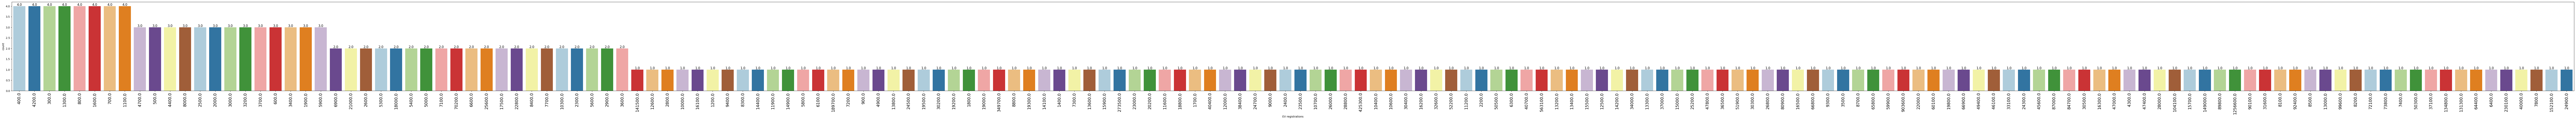

In [26]:
labeled_barplot(df_main, 'EV registrations')

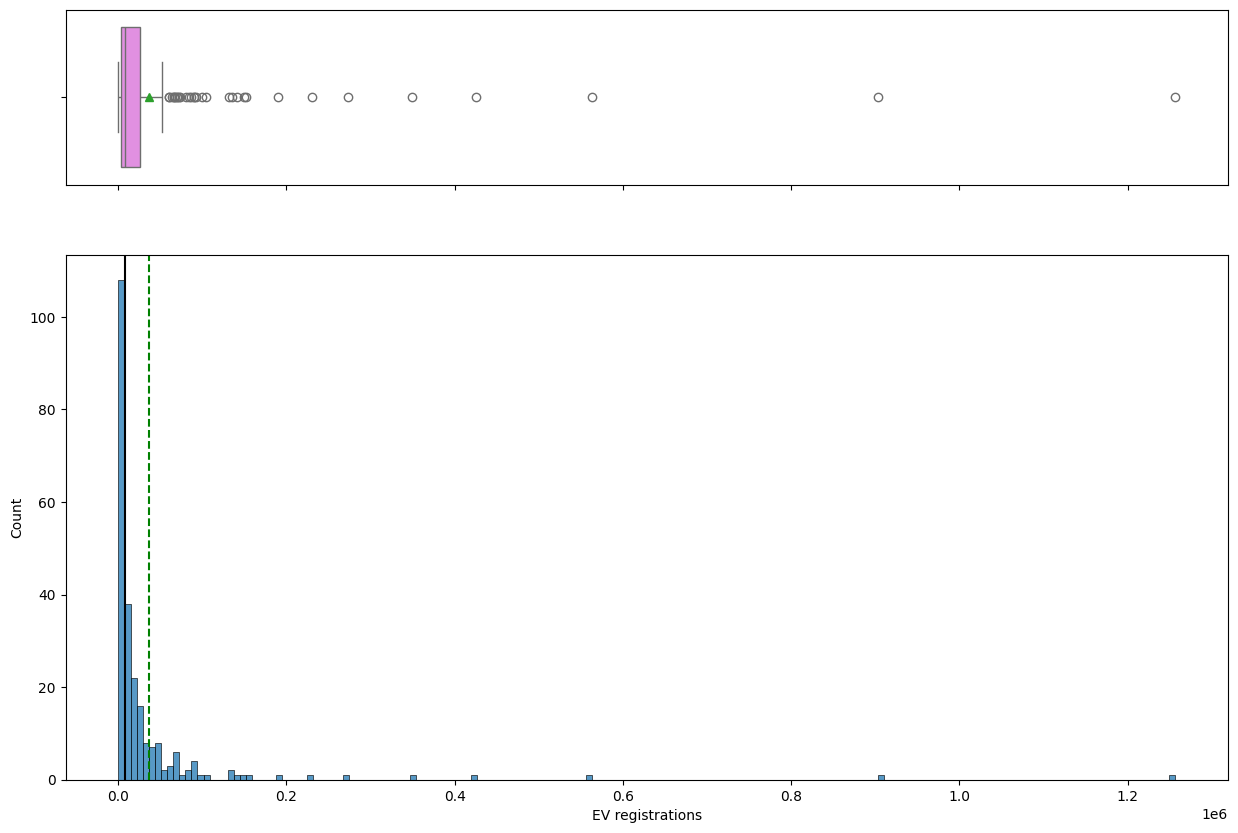

In [27]:
histogram_boxplot(df_main, 'EV registrations')

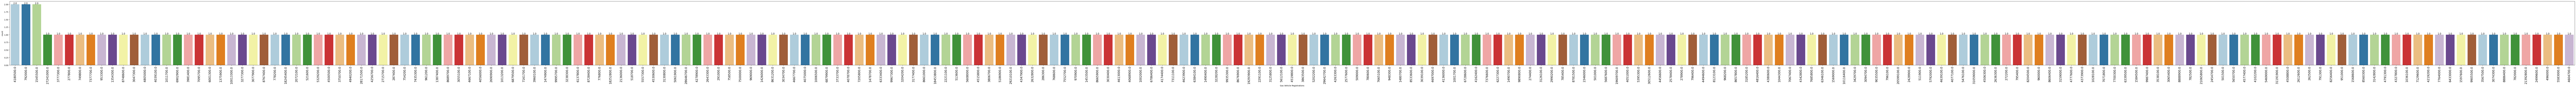

In [31]:
labeled_barplot(df_main, 'Gas Vehicle Registrations')

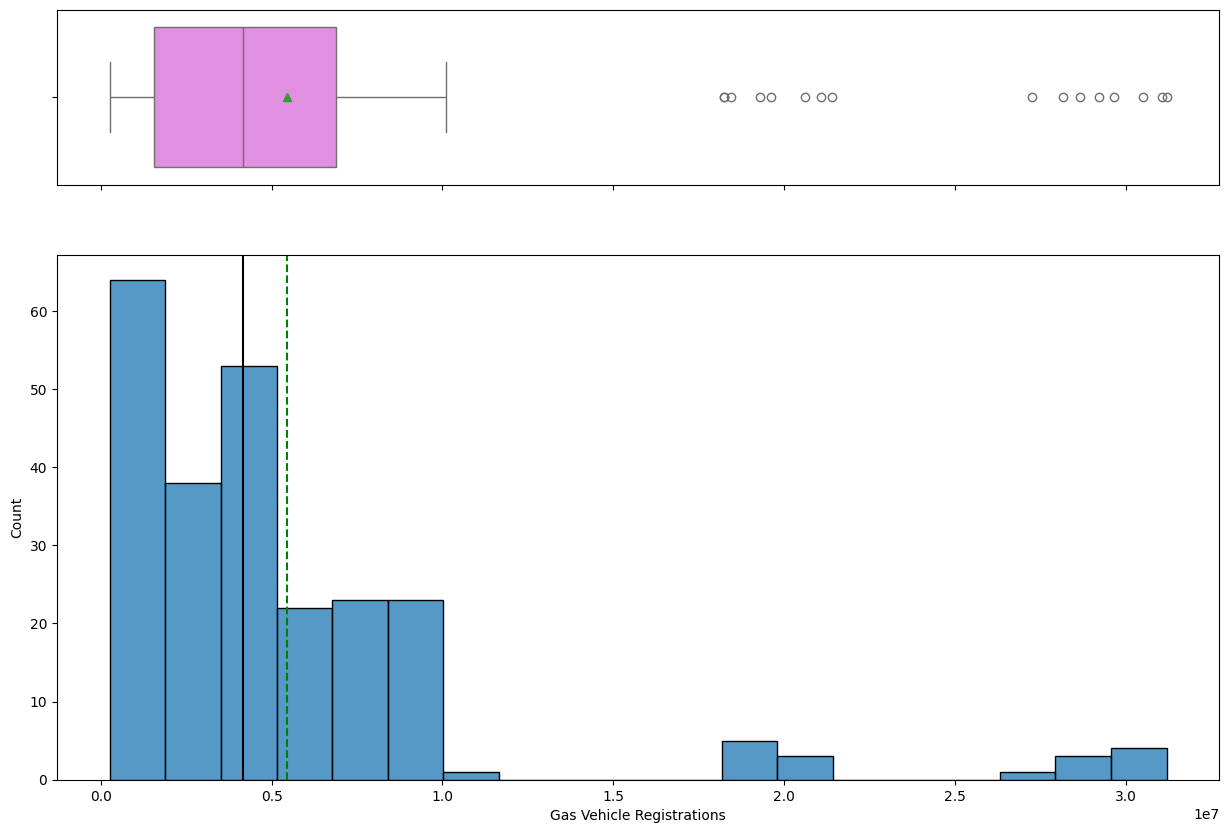

In [28]:
histogram_boxplot(df_main, 'Gas Vehicle Registrations')

In [30]:
print("Descriptive Statistics for df_main:")
display(df_main.describe())

Descriptive Statistics for df_main:


,Year,Average_gas_price,exem,gnt,other,rbate,tax,EV registrations,Gas Vehicle Registrations
count,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000
mean,2019.50000,2.97431,0.36667,0.03333,0.06667,1.40000,0.93333,36783.75000,5441267.91667
std,2.29608,0.71350,0.48290,0.17988,0.24997,1.78511,0.96580,114486.83516,5907222.24066
min,2016.00000,1.89944,0.00000,0.00000,0.00000,0.00000,0.00000,300.00000,262500.00000
25%,2017.75000,2.40542,0.00000,0.00000,0.00000,0.00000,0.00000,3150.00000,1562825.00000
50%,2019.50000,2.81741,0.00000,0.00000,0.00000,1.00000,1.00000,8600.00000,4149200.00000
75%,2021.25000,3.43690,1.00000,0.00000,0.00000,1.00000,1.00000,25700.00000,6885650.00000
max,2023.00000,5.52656,1.00000,1.00000,1.00000,7.00000,3.00000,1256600.00000,31191900.00000


### Bivariate Analysis

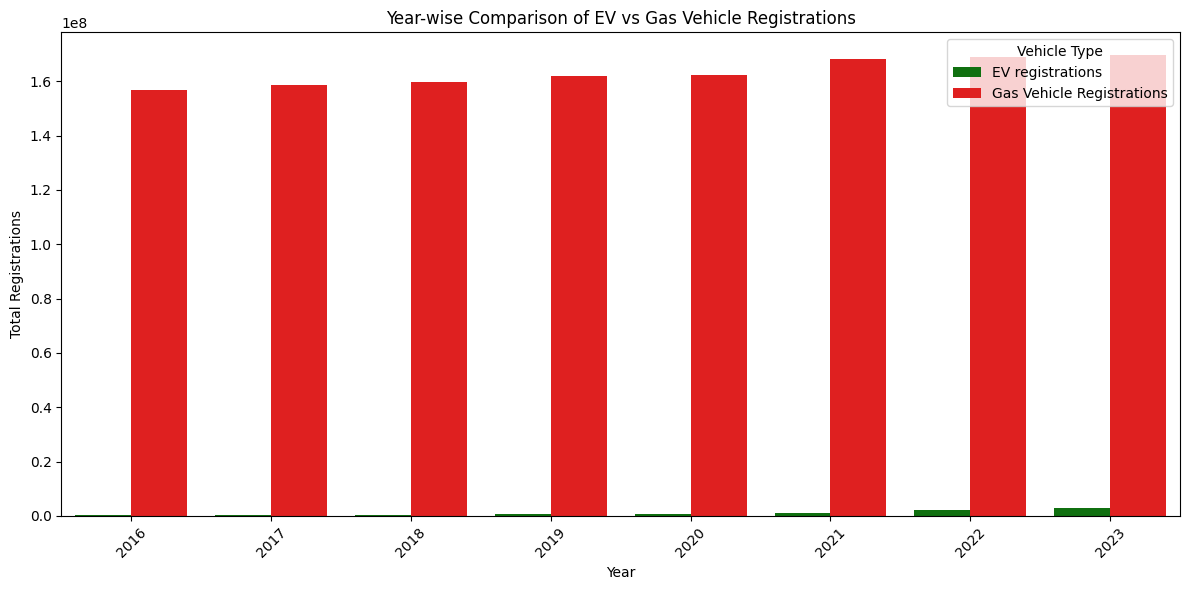

In [31]:
# Group by Year and sum the EV and Gas Vehicle Registrations
year_wise_registrations = df_main.groupby('Year')[['EV registrations', 'Gas Vehicle Registrations']].sum().reset_index()

# Melt the DataFrame to prepare for grouped bar plot
year_wise_registrations_melted = year_wise_registrations.melt('Year', var_name='Vehicle Type', value_name='Total Registrations')

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=year_wise_registrations_melted, x='Year', y='Total Registrations', hue='Vehicle Type', palette={'EV registrations': 'green', 'Gas Vehicle Registrations': 'red'})
plt.title('Year-wise Comparison of EV vs Gas Vehicle Registrations')
plt.xlabel('Year')
plt.ylabel('Total Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

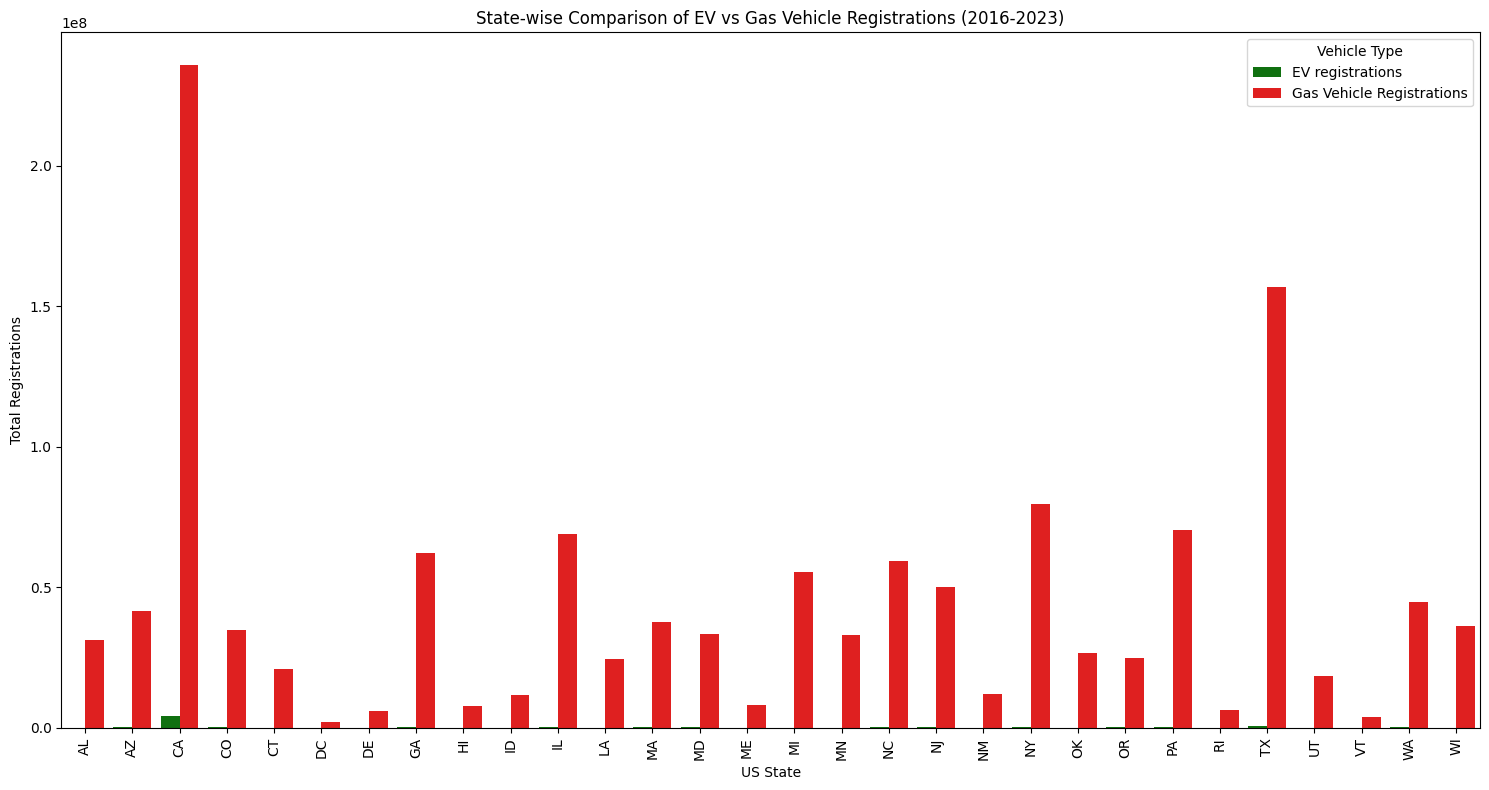

In [32]:
# Group by US_State and sum the EV and Gas Vehicle Registrations
state_wise_registrations = df_main.groupby('US_State')[['EV registrations', 'Gas Vehicle Registrations']].sum().reset_index()

# Melt the DataFrame to prepare for grouped bar plot
state_wise_registrations_melted = state_wise_registrations.melt('US_State', var_name='Vehicle Type', value_name='Total Registrations')

# Create the grouped bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=state_wise_registrations_melted, x='US_State', y='Total Registrations', hue='Vehicle Type', palette={'EV registrations': 'green', 'Gas Vehicle Registrations': 'red'})
plt.title('State-wise Comparison of EV vs Gas Vehicle Registrations (2016-2023)')
plt.xlabel('US State')
plt.ylabel('Total Registrations')
plt.xticks(rotation=90) # Rotate state names for better readability
plt.tight_layout()
plt.show()

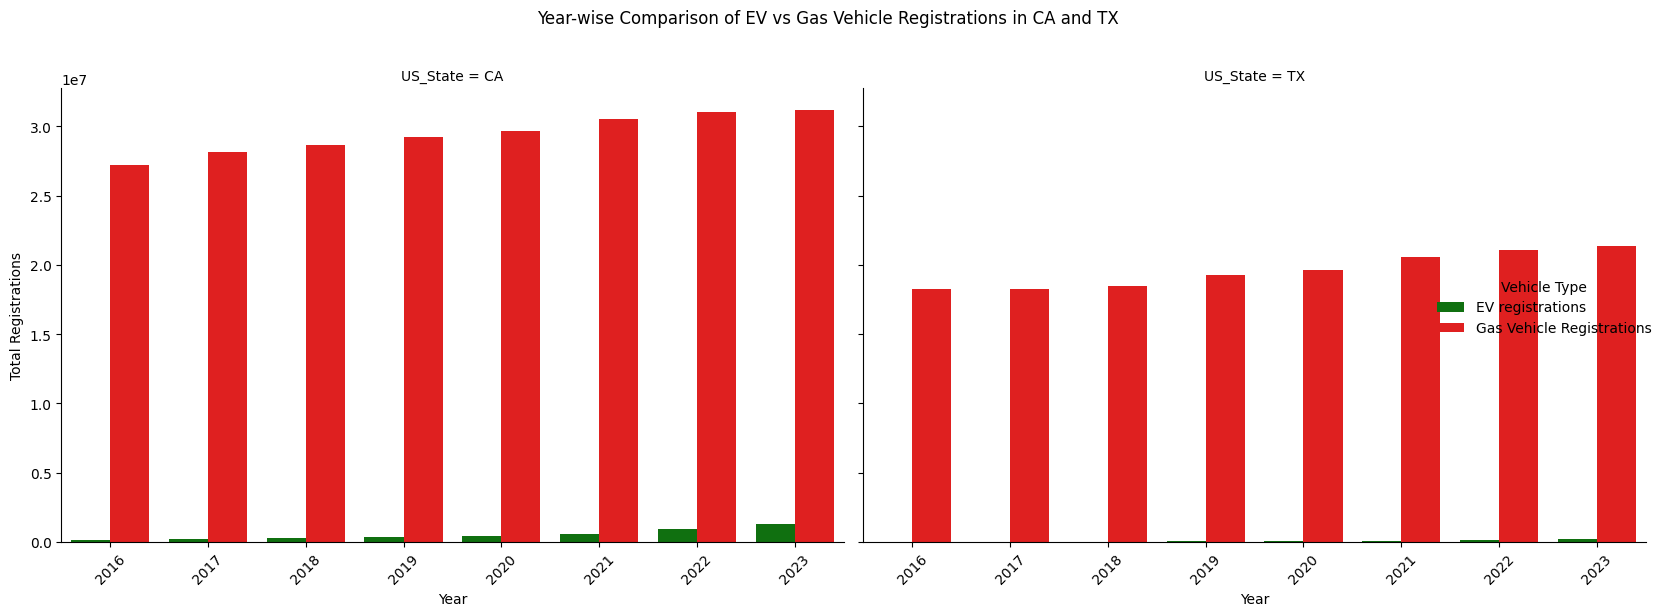

In [34]:

# Filter for California (CA) and Texas (TX)
df_filtered_states = df_main[df_main['US_State'].isin(['CA', 'TX'])]

# Group by Year and US_State, then sum the EV and Gas Vehicle Registrations
state_year_wise_registrations = df_filtered_states.groupby(['Year', 'US_State'])[['EV registrations', 'Gas Vehicle Registrations']].sum().reset_index()

# Melt the DataFrame to prepare for grouped bar plot
state_year_wise_registrations_melted = state_year_wise_registrations.melt(
    id_vars=['Year', 'US_State'],
    var_name='Vehicle Type',
    value_name='Total Registrations'
)

# Create the grouped bar plot using sns.catplot for faceting
g = sns.catplot(
    data=state_year_wise_registrations_melted,
    x='Year',
    y='Total Registrations',
    hue='Vehicle Type',
    col='US_State', # Create separate plots for each state
    kind='bar', # Specify bar plot type
    palette={'EV registrations': 'green', 'Gas Vehicle Registrations': 'red'},
    errorbar=None, # Remove error bars for clarity if summing
    height=6, aspect=1.2 # Adjust figure size for catplot
)
g.fig.suptitle('Year-wise Comparison of EV vs Gas Vehicle Registrations in CA and TX', y=1.02)
g.set_axis_labels('Year', 'Total Registrations')
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Outlier Detection

**Let's check for outliers in the data.**

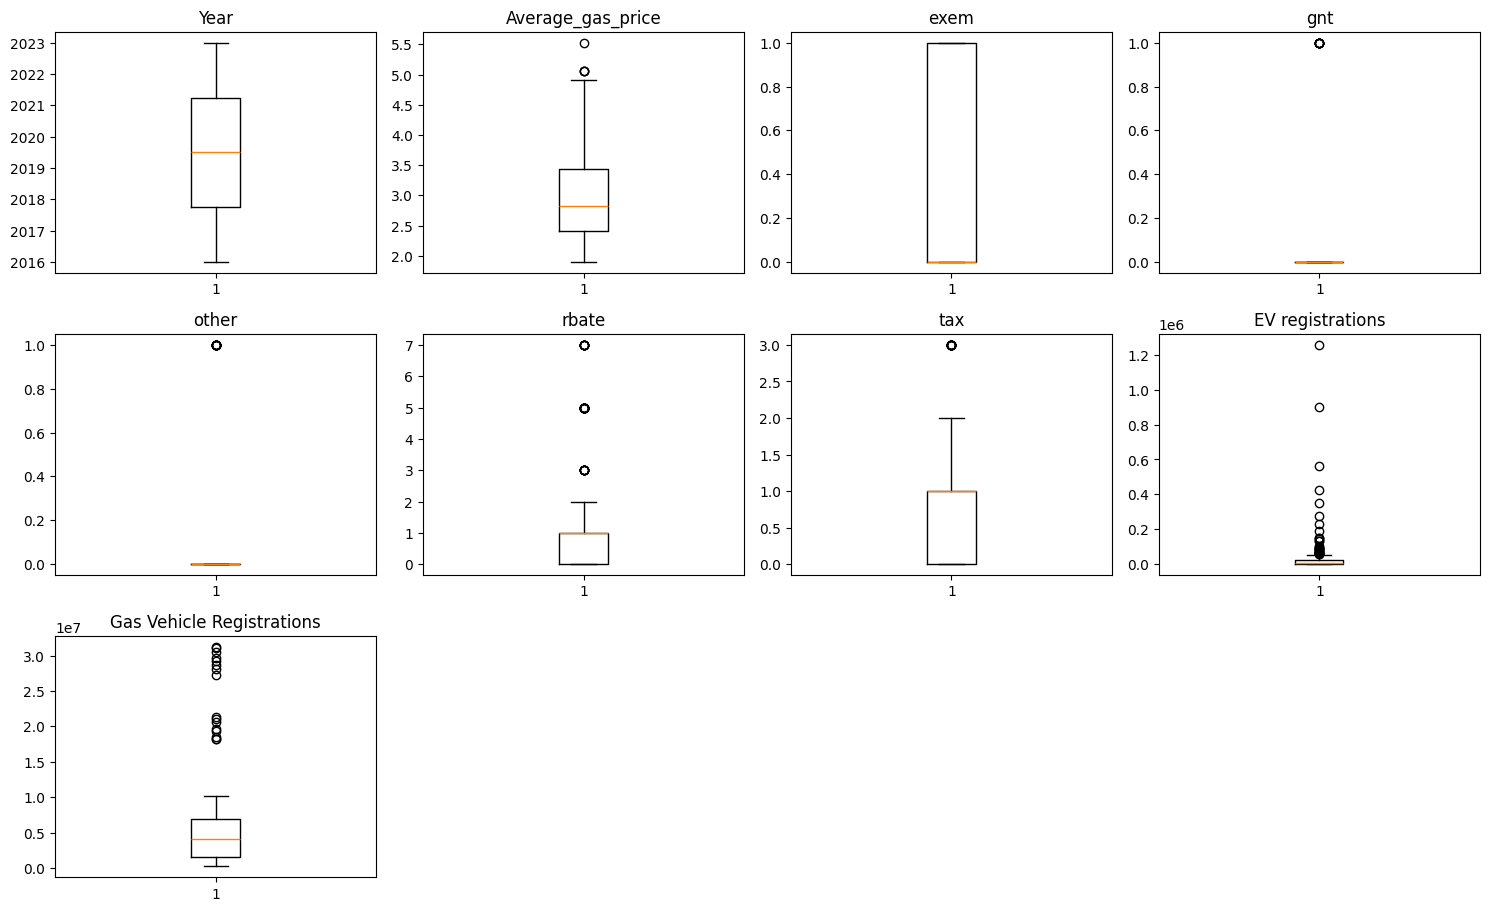

In [44]:
# outlier detection using boxplot
numeric_columns = df_main.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_main[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Heat Map Correlation

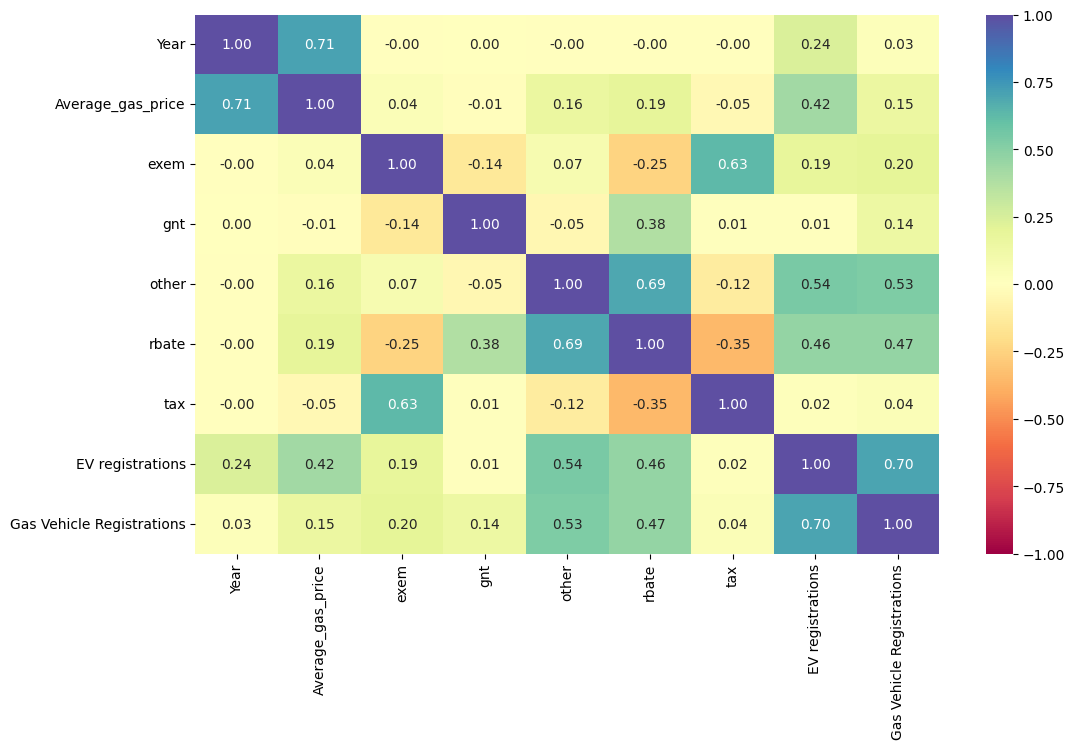

In [45]:
cols_list = df_main.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    df_main[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

## Model Building

### EV Sales substitutive effect on Gas Powered car sales

In [41]:

# Canonicalize column names (handle spaces safely)
rename_map = {
    "EV registrations": "EV_registrations",
    "Gas Vehicle Registrations": "Gas_vehicle_registrations",
    "Average_gas_price": "Average_gas_price",
    "US_State": "US_State",
    "Year": "Year",
    "exem": "exem",
    "gnt": "gnt",
    "other": "other",
    "rbate": "rbate",
    "tax": "tax",
}
df = df_main.rename(columns=rename_map)

# Coerce numerics
numeric_cols = [
    "Year", "Average_gas_price",
    "exem", "gnt", "other", "rbate", "tax",
    "EV_registrations", "Gas_vehicle_registrations"
]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Drop rows missing essentials
essential = ["US_State", "Year", "EV_registrations", "Gas_vehicle_registrations"]
df = df.dropna(subset=essential).copy()

# Enforce types
df["US_State"] = df["US_State"].astype("category")
df["Year"] = df["Year"].astype(int)


In [42]:

# Construct transformed variables
df["ln_gas"] = np.log1p(df["Gas_vehicle_registrations"])
df["ln_ev"]  = np.log1p(df["EV_registrations"])

# Formula with fixed effects (C() expands dummies internally)
formula = """
ln_gas ~ ln_ev
        + Average_gas_price
        + exem + gnt + other + rbate + tax
        + C(US_State) + C(Year)
"""

# Fit OLS with cluster-robust standard errors (cluster by state)
ols_fe = smf.ols(formula, data=df).fit(
    cov_type="cluster", cov_kwds={"groups": df["US_State"]}
)

print(ols_fe.summary())


                            OLS Regression Results                            
Dep. Variable:                 ln_gas   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.017e+05
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           9.52e-63
Time:                        16:18:16   Log-Likelihood:                 550.89
No. Observations:                 240   AIC:                            -1024.
Df Residuals:                     201   BIC:                            -888.0
Df Model:                          38                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.7689      0.17

### Adoption of EV across policies


In [47]:
from scipy.stats import f_oneway

# Example: create a grouped policy variable
df["policy_group"] = (
      df["exem"] * 1
    + df["gnt"]  * 2
    + df["other"] * 3
    + df["rbate"] * 4
    + df["tax"]   * 5
)

groups = [df["EV_registrations"][df["policy_group"] == g]
          for g in df["policy_group"].unique()]

f_stat, p_value = f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0: EV adoption differs across at least one policy group.")
else:
    print("Fail to reject H0: No evidence of policy group differences.")

ANOVA F-statistic: 26.674801977084563
p-value: 1.195736152174096e-38
Reject H0: EV adoption differs across at least one policy group.


### Person Correlation for Gas price to EV Registrations

In [53]:
from scipy.stats import pearsonr

corr, pval = pearsonr(df["Average_gas_price"], df["EV_registrations"])

print("Correlation:", corr)
print("P-value:", pval)

print("\n--- Hypothesis Test Result ---")
if pval < 0.05:
    print("Reject H0: Gasoline price and EV sales ARE linearly related.")
else:
    print("Fail to reject H0: No linear relationship detected.")

Correlation: 0.4241960181950961
P-value: 6.6869076518842796e-12

--- Hypothesis Test Result ---
Reject H0: Gasoline price and EV sales ARE linearly related.


### Time Series Prediction models